In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(df.label.reshape(-1,1))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)

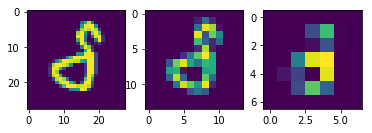

In [5]:
img = df.iloc[125][1:].reshape(28,28).astype(np.uint8)

fig,axes = plt.subplots(1,3)
axes[0].imshow(img)
axes[1].imshow(cv2.resize(img,(14,14)))
axes[2].imshow(cv2.resize(img,(7,7)))

In [6]:
def crop(img,size=28):
    
    H_MIN,H_MAX = np.where(img.std(axis=1)>8)[0][[0,-1]]
    W_MIN,W_MAX = np.where(img.std(axis=0)>8)[0][[0,-1]]
    
    img = img[H_MIN:H_MAX,W_MIN:W_MAX]
    img = np.pad(img,pad_width=2)
    
    return cv2.resize(img.astype(np.uint8),(size,size))

def input_gen(df,epochs=10,_crop=True):
    for epoch in range(epochs):
        for i in range(df.shape[0]):
            row = df.iloc[i].values
            y = ohe.transform([[row[0]]])
            img_28 = crop(row[1:].reshape(28,28))
            img_14 = crop(row[1:].reshape(28,28),size=14)
            yield (
                {
                    "input_28":img_28.reshape(1,28,28,1)/255,
#                     "input_14":img_14.reshape(1,14,14,1)/255
                },
                {"output":y}
            )

In [7]:
input_28 = Input(shape=(28,28,1),name="input_28")

model = Conv2D(filters=32,kernel_size=4,input_shape=(28,28,1),activation="relu")(input_28)
model = Conv2D(32,3,activation="relu")(model)
model = MaxPool2D(pool_size=(3,3))(model)
model = Conv2D(32,3,activation="relu")(model)
model = Conv2D(64,2,activation="relu")(model)
model = Conv2D(64,3,activation="relu")(model)
model = MaxPool2D(pool_size=1)(model)
model = Flatten()(model)
model = Dense(1024,activation="relu")(model)
model = Dense(10,activation="softmax")(model)


output = Dense(10,activation="softmax",name="output")(model)
model = Model(inputs=[input_28],outputs=[output])



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [9]:
labels = df.pop("label")

In [10]:
labels = labels.values.reshape(-1,1)

In [11]:
labels = ohe.transform(labels)

In [12]:
images = df.values.reshape(-1,28,28,1)

In [13]:
model.fit(images,labels)

Train on 42000 samples
37248/42000 [=========================>....] - ETA: 0s - loss: 2.3131 - acc: 0.1060

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-b196e74e57a0>", line 1, in <module>
    model.fit(images,labels)
  File "/usr/lib/python3/dist-packages/tensorflow_core/python/keras/engine/training.py", line 727, in fit
    use_multiprocessing=use_multiprocessing)
  File "/usr/lib/python3/dist-packages/tensorflow_core/python/keras/engine/training_arrays.py", line 675, in fit
    steps_name='steps_per_epoch')
  File "/usr/lib/python3/dist-packages/tensorflow_core/python/keras/engine/training_arrays.py", line 405, in model_iteration
    callbacks._call_batch_hook(mode, 'end', batch_index, batch_logs)
  File "/usr/lib/python3/dist-packages/tensorflow_core/python/keras/callbacks.py", line 239, in _call_batch_hook
    delta_t_median = np.median(self._delta_ts[hook_name])
  File "<__array_function__ internals>", line 6, in 

KeyboardInterrupt: 